In [2]:
from torch.utils.data import Dataset, DataLoader
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def multindex_iloc(df, index, level=0):
    label = df.index.levels[level][index]
    return df.iloc[df.index.get_loc(label)]

In [66]:
class AfricanFieldsDataset(Dataset):
    """African Fields dataset."""

    def __init__(
        self,
        csv_file,
        root_dir,
        bands=("B02", "B03", "B04"),
        dates=("2017-01-01"),
        resize_inter=cv2.INTER_NEAREST,
    ):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Image paths are relative to this dir
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = pd.read_csv(csv_file)
        self.df.set_index(["Field_Id", "Band"], inplace=True)
        self.df.sort_index(inplace=True)
        self.dates = dates
        self.bands = bands
        self.resize_inter = resize_inter

        self.root_dir = root_dir
#         self.transform = transform

    def __len__(self):
        return len(list(self.df.index.levels[0].unique()))

    def __getitem__(self, idx):
        field_info = multindex_iloc(self.df, idx)
        label = field_info["Crop_Id_Ne"][0]
#         field_info = field_info[self.dates]
        
        field_id = field_info.index.get_level_values("Field_Id")[0]
        field_info = field_info.loc[
            field_info.index.get_level_values("Band").isin(self.bands)
        ]
        image_sequence = []
        for date in self.dates:
            date_info = field_info[date]
            image_names = list(date_info)
            images = []
            max_shape = [0, 0]
            for name in image_names:
                image = np.load(os.path.join(self.root_dir, name)).squeeze()
                if image.shape[0] > max_shape[0]:
                    max_shape = image.shape

                images.append(image)

            stacked_image = np.zeros(max_shape + (len(image_names),))
            for i, image in enumerate(images):
                stacked_image[:, :, i] = cv2.resize(
                    image, max_shape[::-1], interpolation=self.resize_inter
                )
            image_sequence.append(stacked_image)
        
        image_sequence = np.array(image_sequence)
        sample = {"image_sequence": image_sequence, "label": label, "id": field_id}

#         if self.transform:
#             sample = self.transform(sample)

        return sample

In [5]:
df = pd.read_csv('data/train.csv')

In [6]:
df.set_index(['Field_Id', 'Band'], inplace=True)

In [7]:
df.sort_index(inplace=True)

In [8]:
field_info = multindex_iloc(df, 0)

In [9]:
field_info

Subregion  Crop_Id_Ne  \
Field_Id Band                          
1        B01           3           8   
         B02           3           8   
         B03           3           8   
         B04           3           8   
         B05           3           8   
         B06           3           8   
         B07           3           8   
         B08           3           8   
         B09           3           8   
         B10           3           8   
         B11           3           8   
         B12           3           8   
         B8A           3           8   

                                                   2017-01-01  \
Field_Id Band                                                   
1        B01   data/images_cropped\train\1_B01_2017-01-01.npy   
         B02   data/images_cropped\train\1_B02_2017-01-01.npy   
         B03   data/images_cropped\train\1_B03_2017-01-01.npy   
         B04   data/images_cropped\train\1_B04_2017-01-01.npy   
         B05   data/images_cropped\train\1_B05_2017-01-01.npy   
         B06   data/images_cropped\train\1_B06_2017-01-01.npy   
         B07   data/images_cropped\train\1_B07_2017-01-01.npy   
         B08   data/images_cropped\train\1_B08_2017-01-01.npy   
         B09   data/images_cropped\train\1_B09_2017-01-01.npy   
         B10   data/images_cropped\train\1_B10_2017-01-01.npy   
         B11   data/images_cropped\train\1_B11_2017-01-01.npy   
         B12   data/images_cropped\train\1_B12_2017-01-01.npy   
         B8A   data/images_cropped\train\1_B8A_2017-01-01.npy   

                                                   2017-01-31  \
Field_Id Band                                                   
1        B01   data/images_cropped\train\1_B01_2017-01-31.npy   
         B02   data/images_cropped\train\1_B02_2017-01-31.npy   
         B03   data/images_cropped\train\1_B03_2017-01-31.npy   
         B04   data/images_cropped\train\1_B04_2017-01-31.npy   
         B05   data/images_cropped\train\1_B05_2017-01-31.npy   
         B06   data/images_cropped\train\1_B06_2017-01-31.npy   
         B07   data/images_cropped\train\1_B07_2017-01-31.npy   
         B08   data/images_cropped\train\1_B08_2017-01-31.npy   
         B09   data/images_cropped\train\1_B09_2017-01-31.npy   
         B10   data/images_cropped\train\1_B10_2017-01-31.npy   
         B11   data/images_cropped\train\1_B11_2017-01-31.npy   
         B12   data/images_cropped\train\1_B12_2017-01-31.npy   
         B8A   data/images_cropped\train\1_B8A_2017-01-31.npy   

                                                   2017-02-10  \
Field_Id Band                                                   
1        B01   data/images_cropped\train\1_B01_2017-02-10.npy   
         B02   data/images_cropped\train\1_B02_2017-02-10.npy   
         B03   data/images_cropped\train\1_B03_2017-02-10.npy   
         B04   data/images_cropped\train\1_B04_2017-02-10.npy   
         B05   data/images_cropped\train\1_B05_2017-02-10.npy   
         B06   data/images_cropped\train\1_B06_2017-02-10.npy   
         B07   data/images_cropped\train\1_B07_2017-02-10.npy   
         B08   data/images_cropped\train\1_B08_2017-02-10.npy   
         B09   data/images_cropped\train\1_B09_2017-02-10.npy   
         B10   data/images_cropped\train\1_B10_2017-02-10.npy   
         B11   data/images_cropped\train\1_B11_2017-02-10.npy   
         B12   data/images_cropped\train\1_B12_2017-02-10.npy   
         B8A   data/images_cropped\train\1_B8A_2017-02-10.npy   

                                                   2017-03-12  \
Field_Id Band                                                   
1        B01   data/images_cropped\train\1_B01_2017-03-12.npy   
         B02   data/images_cropped\train\1_B02_2017-03-12.npy   
         B03   data/images_cropped\train\1_B03_2017-03-12.npy   
         B04   data/images_cropped\train\1_B04_2017-03-12.npy   
         B05   data/images_cropped\train\1_B05_2017-03-12.npy   
         B06   data/images_crop

In [10]:
field_info['Crop_Id_Ne'][0]

8

In [12]:
field_info = field_info[['2017-01-01', '2017-01-31']]

In [13]:
field_info

2017-01-01  \
Field_Id Band                                                   
1        B01   data/images_cropped\train\1_B01_2017-01-01.npy   
         B02   data/images_cropped\train\1_B02_2017-01-01.npy   
         B03   data/images_cropped\train\1_B03_2017-01-01.npy   
         B04   data/images_cropped\train\1_B04_2017-01-01.npy   
         B05   data/images_cropped\train\1_B05_2017-01-01.npy   
         B06   data/images_cropped\train\1_B06_2017-01-01.npy   
         B07   data/images_cropped\train\1_B07_2017-01-01.npy   
         B08   data/images_cropped\train\1_B08_2017-01-01.npy   
         B09   data/images_cropped\train\1_B09_2017-01-01.npy   
         B10   data/images_cropped\train\1_B10_2017-01-01.npy   
         B11   data/images_cropped\train\1_B11_2017-01-01.npy   
         B12   data/images_cropped\train\1_B12_2017-01-01.npy   
         B8A   data/images_cropped\train\1_B8A_2017-01-01.npy   

                                                   2017-01-31  
Field_Id Band                                                  
1        B01   data/images_cropped\train\1_B01_2017-01-31.npy  
         B02   data/images_cropped\train\1_B02_2017-01-31.npy  
         B03   data/images_cropped\train\1_B03_2017-01-31.npy  
         B04   data/images_cropped\train\1_B04_2017-01-31.npy  
         B05   data/images_cropped\train\1_B05_2017-01-31.npy  
         B06   data/images_cropped\train\1_B06_2017-01-31.npy  
         B07   data/images_cropped\train\1_B07_2017-01-31.npy  
         B08   data/images_cropped\train\1_B08_2017-01-31.npy  
         B09   data/images_cropped\train\1_B09_2017-01-31.npy  
         B10   data/images_cropped\train\1_B10_2017-01-31.npy  
         B11   data/images_cropped\train\1_B11_2017-01-31.npy  
         B12   data/images_cropped\train\1_B12_2017-01-31.npy  
         B8A   data/images_cropped\train\1_B8A_2017-01-31.npy

In [19]:
field_info.index.get_level_values('Field_Id')[0]

1

In [14]:
field_info = field_info.loc[field_info.index.get_level_values('Band').isin(['B02', 'B03', 'B04'])]

In [21]:
field_info

2017-01-01  \
Field_Id Band                                                   
1        B02   data/images_cropped\train\1_B02_2017-01-01.npy   
         B03   data/images_cropped\train\1_B03_2017-01-01.npy   
         B04   data/images_cropped\train\1_B04_2017-01-01.npy   

                                                   2017-01-31  
Field_Id Band                                                  
1        B02   data/images_cropped\train\1_B02_2017-01-31.npy  
         B03   data/images_cropped\train\1_B03_2017-01-31.npy  
         B04   data/images_cropped\train\1_B04_2017-01-31.npy

In [15]:
list(field_info)

['2017-01-01', '2017-01-31']

In [53]:
(1,2) + (3,)

(1, 2, 3)

In [64]:
dataset = AfricanFieldsDataset(csv_file='data/train.csv', bands=['B04', 'B03', 'B02'], root_dir='./')

In [65]:
%%timeit
dataset[0]

14.9 ms ± 658 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0 (11, 10, 14, 3) 8
1 (11, 19, 17, 3) 6
2 (11, 12, 12, 3) 8
3 (11, 22, 16, 3) 8
4 (11, 30, 25, 3) 8
5 (11, 34, 7, 3) 8
6 (11, 26, 25, 3) 8
7 (11, 26, 9, 3) 8
8 (11, 26, 19, 3) 8
9 (11, 15, 19, 3) 8
10 (11, 16, 16, 3) 7
11 (11, 8, 11, 3) 9
12 (11, 19, 16, 3) 9
13 (11, 19, 13, 3) 1
14 (11, 20, 13, 3) 8
15 (11, 11, 23, 3) 8


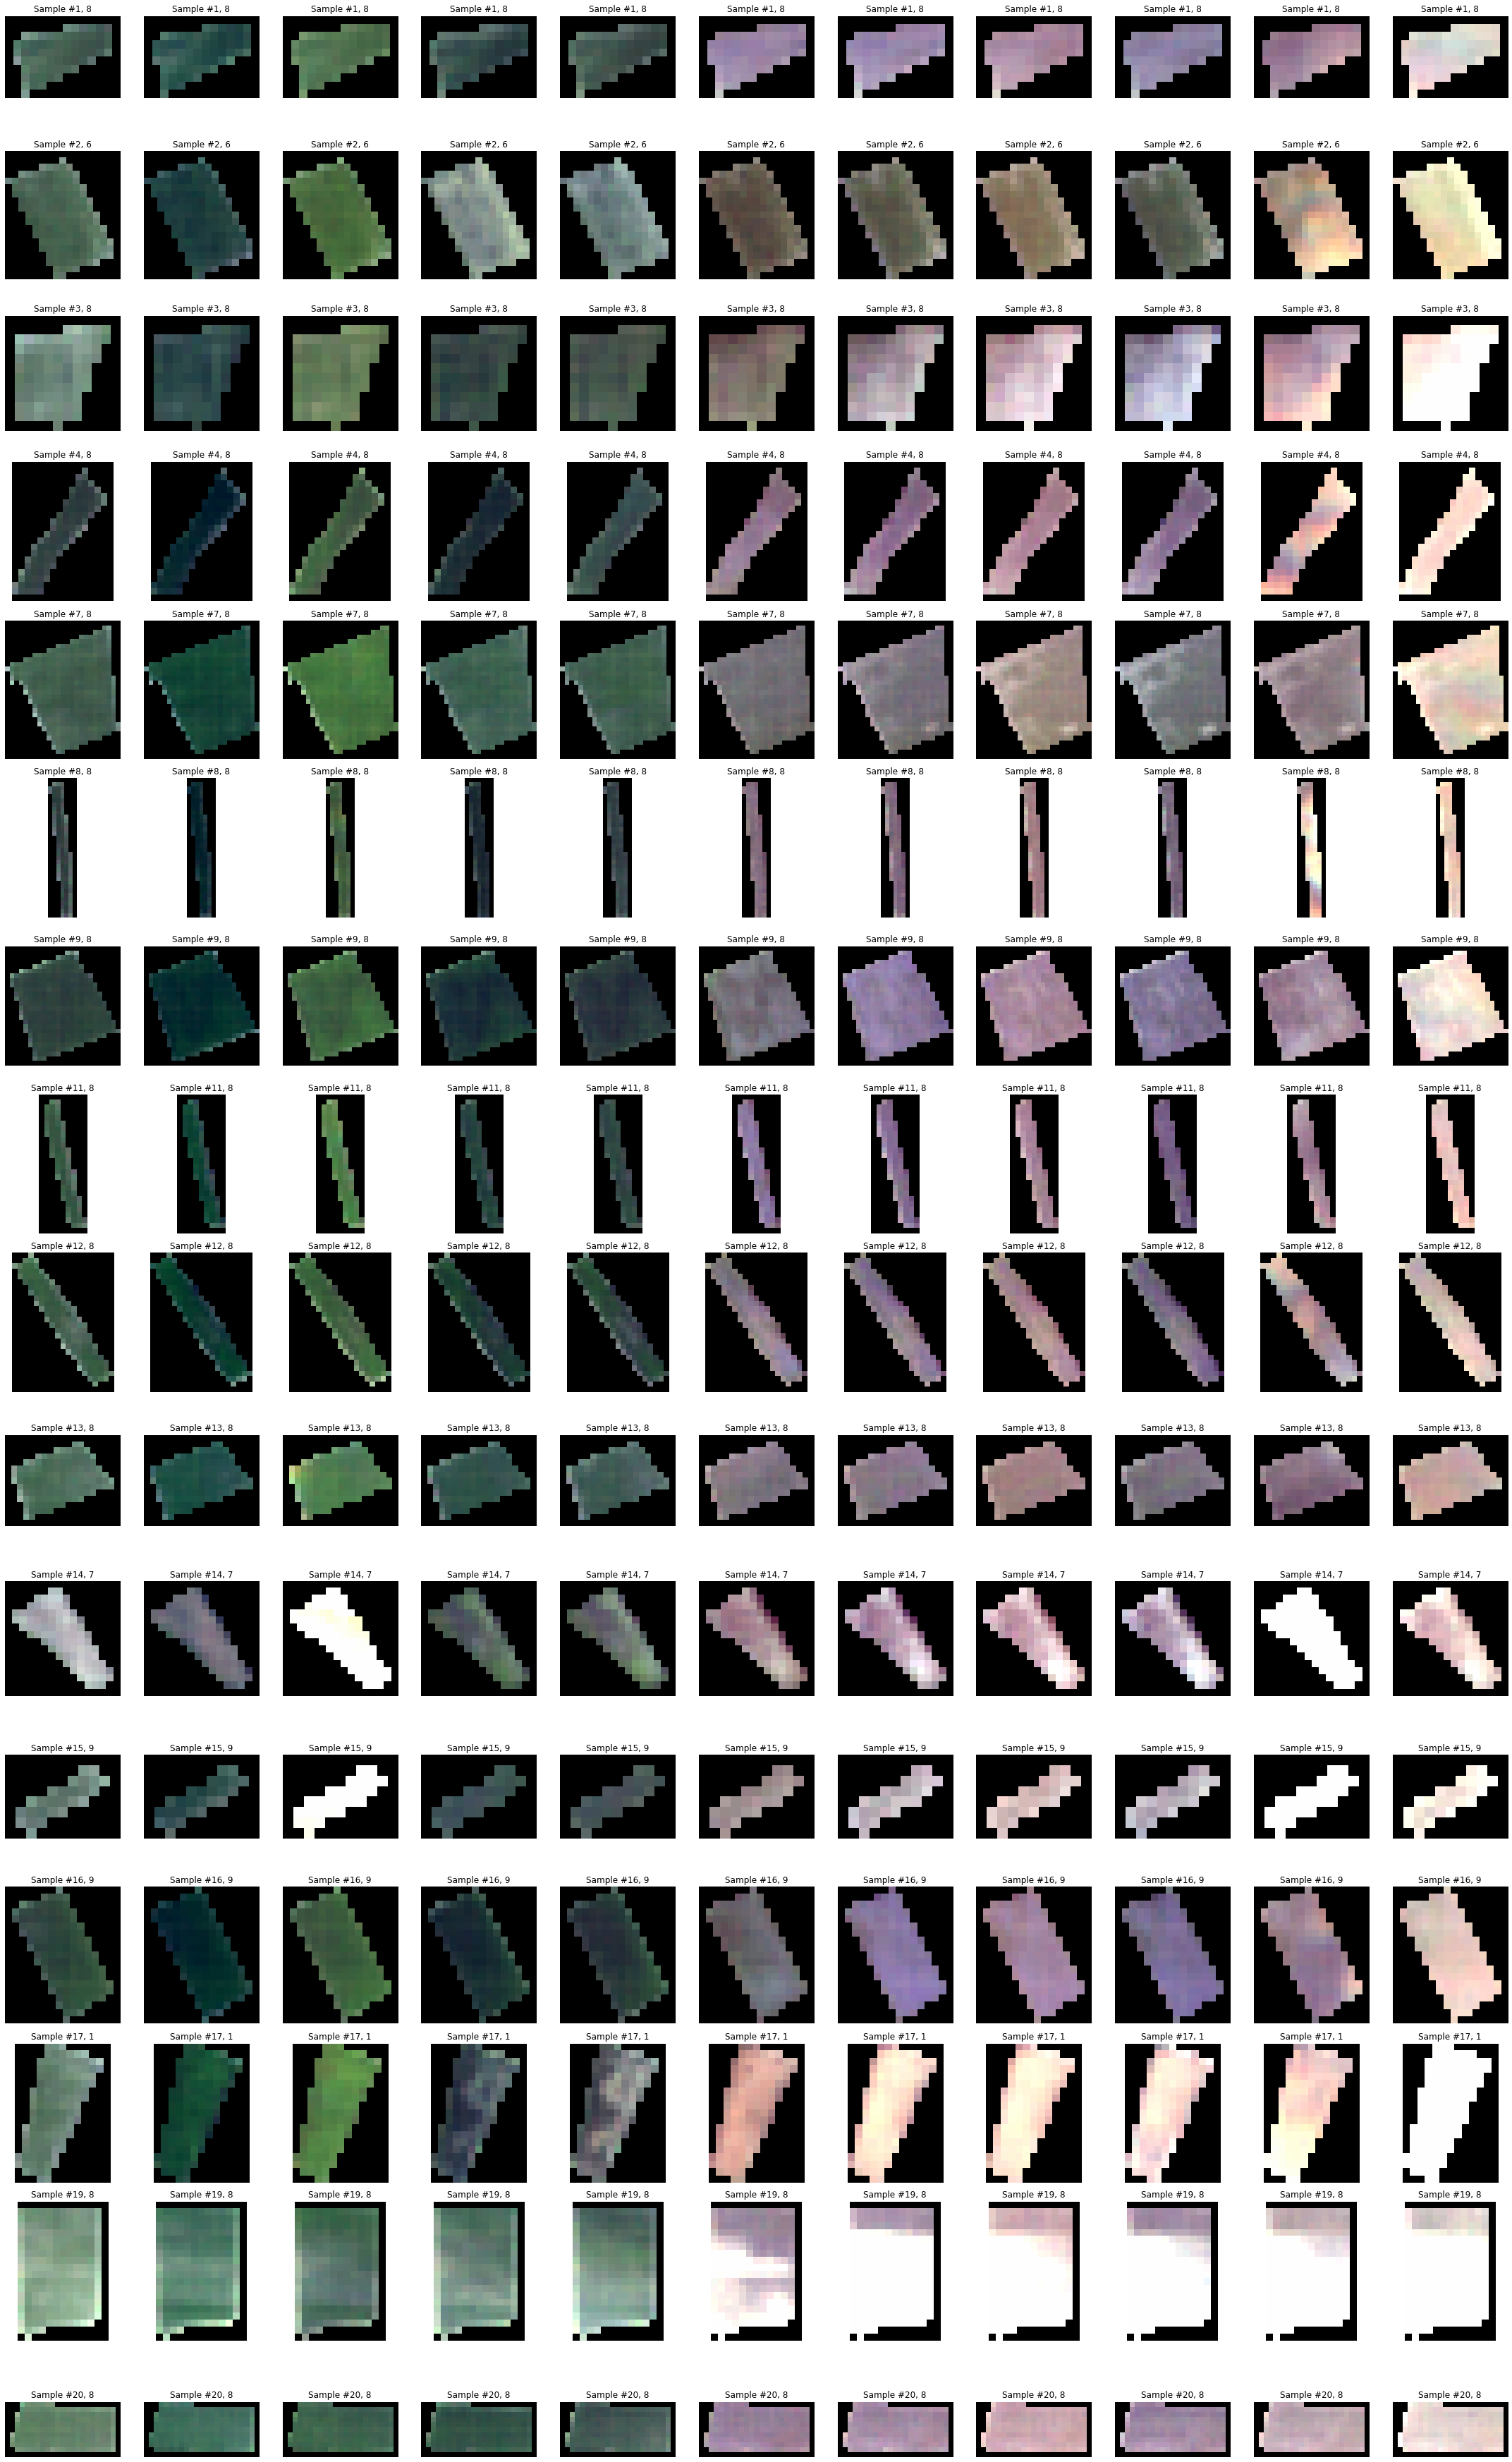

In [67]:
def setup_subplot(sample, i):
    ax = plt.subplot(16, 11, i)
    plt.tight_layout()
    ax.set_title(f'Sample #{sample["id"]}, {sample["label"]}')
    ax.axis('off')


dataset = AfricanFieldsDataset(
    csv_file='data/train.csv',
    bands=['B04', 'B03', 'B02'],
    dates=("2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12","2017-03-22","2017-05-31","2017-06-20","2017-07-10","2017-07-15","2017-08-04","2017-08-19"),
    root_dir='./')
fig = plt.figure(figsize=(30,50))

for i in range(len(dataset)):
#     i = i+1
    
    sample = dataset[i]

    print(i, sample['image_sequence'].shape, sample['label'])
    for j, image in enumerate(sample['image_sequence']):
        j = j+1
        setup_subplot(sample, 11*i + j)
        plt.imshow(image)
#     show_landmarks(**sample)

    if i == 15:
        plt.savefig('hmmm.pdf')
        plt.show()
        break

In [9]:
import torchvision
import torch

In [10]:
trainset = torchvision.datasets.CIFAR10(
    root='./test', train=True,
    download=True)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=3,
    shuffle=True)

Files already downloaded and verified


In [11]:
trainset[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2406758E898>, 6)